<a href="https://colab.research.google.com/github/masoume-pasebani/sentiment_analysis/blob/main/Copy_of_Colaboratory_Release_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please follow our [blog](https://medium.com/google-colab) to see more information about new features, tips and tricks, and featured notebooks such as [Analyzing a Bank Failure with Colab](https://medium.com/google-colab/noteworthy-notebooks-3-analyzing-a-bank-failure-with-colab-d23b372de313).

In [2]:
pip install matplotlib

In [3]:
pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [4]:
!pip install stopwords_guilannlp


In [64]:
pip install gensim==3.8.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [17]:
pip install Keras-Preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [6]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec


--2023-09-03 14:39:12--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.162.35, 108.157.162.108, 108.157.162.120, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.162.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1105157170 (1.0G) [binary/octet-stream]
Saving to: ‘wiki.fa.vec’

wiki.fa.vec         100%[===================>]   1.03G  86.6MB/s    in 13s     

2023-09-03 14:39:26 (79.0 MB/s) - ‘wiki.fa.vec’ saved [1105157170/1105157170]



In [6]:
import numpy as np
import pandas as pd
import codecs
from google.colab import files
from gensim import *
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from stopwords_guilannlp import stopwords_output
from hazm import *
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [25]:
upload = files.upload()


Saving translation.csv to translation.csv


In [9]:
test = pd.read_csv('test.csv', index_col=None, header=None, encoding="utf-8")


In [10]:

x_test = test[0]
y_test = test[1]

In [11]:

print('Number of testing sentence: ', x_test.shape)
print('Number of testing label: ', y_test.shape)

Number of testing sentence:  (1854,)
Number of testing label:  (1854,)


In [12]:
y_test_binary = []
x_test_binary = []
for i, y in enumerate(y_test):
  if int(y) != 0:
    if int(y) > 0:
      y_test_binary.append(1)
      x_test_binary.append(x_test[i])
    else:
      y_test_binary.append(0)
      x_test_binary.append(x_test[i])

In [13]:

x_test = np.asarray(x_test_binary)
y_test = np.asarray(y_test_binary)

In [14]:
original = pd.read_csv('original.csv', index_col=None, header=None, encoding="utf-8")
balanced = pd.read_csv('balanced.csv', index_col=None, header=None, encoding="utf-8")
translation = pd.read_csv('translation.csv', index_col=None, header=None, encoding="utf-8")

In [15]:
selected = translation


In [16]:
selected = selected.sample(frac=1).reset_index(drop=True)


In [17]:

x_train = selected[0]
y_train = selected[1]

In [18]:

print('Number of training sentence: ', x_train.shape)
print('Number of training label: ', y_train.shape)

Number of training sentence:  (14046,)
Number of training label:  (14046,)


In [19]:
y_train_binary = []
x_train_binary = []
for i, y in enumerate(y_train):
  if int(y) != 0:
    if int(y) > 0:
      y_train_binary.append(1)
      x_train_binary.append(x_train[i])
    else:
      y_train_binary.append(0)
      x_train_binary.append(x_train[i])

In [20]:
x_train = np.asarray(x_train_binary)
y_train = np.asarray(y_train_binary)

In [21]:
from collections import Counter
cnt = Counter(y_train)
cnt = dict(cnt)
print(cnt)

{1: 7856, 0: 2190}


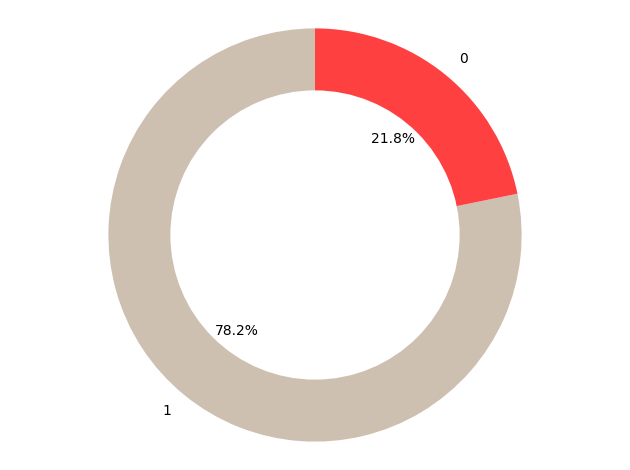

In [22]:

labels = list(cnt.keys())
sizes = list(cnt.values())
colors = ['#CDC0B0', '#FF4040', '#8B5F65', '#FFAEB9', '#CD2626']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()

plt.show()

In [23]:
Punctuations_mark = ['،', '.', '؛', ':', ';', '"']
normalizer = Normalizer()
lemmatizer = Lemmatizer()

def clean(doc):
  doc = normalizer.normalize(doc)
  tokenized = word_tokenize(doc)
  tokens = []

  for t in tokenized:
    temp = t
    for p in Punctuations_mark:
      temp = temp.replace(p, '')
    tokens.append(temp)

  tokens = [w for w in tokens if not len(w) <= 1]
  tokens = [w for w in tokens if not w.isdigit()]
  tokens = [lemmatizer.lemmatize(w) for w in tokens]
  tokens = ' '.join(tokens)

  return tokens

In [2]:
from gensim.models import keyedvectors
EMBEDDING_FILE = 'wiki.fa.vec'

def import_def(file_address):
  ft_model = keyedvectors.load_word2vec_format(file_address)

  ft_words = []
  for ft_word in ft_model.key_to_index:
    ft_words.append(ft_word)
  return ft_model, ft_words

ft_model, ft_words = import_def(EMBEDDING_FILE)

In [4]:
embed_size = 300


In [7]:
embedding_list = list()
for w in ft_words:
  embedding_list.append(ft_model[w])

all_embedding = np.stack(embedding_list)
emb_mean, emb_std = all_embedding.mean(), all_embedding.std()

In [24]:
train_documents = np.empty_like(x_train)
for i, d in enumerate(x_train):
  train_documents[i] = clean(d)

In [26]:
test_documents = np.empty_like(x_test)
for i, d in enumerate(x_test):
  test_documents[i] = clean(d)

In [27]:
number_of_words = 2500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_documents)

In [28]:
max_l = max([len(s.split()) for s in train_documents])

In [29]:
encoded_documents = tokenizer.texts_to_sequences(train_documents)

x_train_padded = pad_sequences(encoded_documents, maxlen = max_l, padding = "post")


In [30]:
vocab_size = len(tokenizer.word_index)

In [36]:
nb_words = len(tokenizer.word_index)
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

embedded_Count = 0
for w, i in tokenizer.word_index.items():
  i-=1

  if w in ft_model.key_to_index:
    embedding_vector = ft_model[w]
    embedding_matrix[i] = embedding_vector
    embedded_Count += 1

  else:
    embedding_vector = ft_model['subdivision_name']
    embedding_matrix[i] = embedding_vector
    embedded_Count += 1

print('total embedded:', embedded_Count, 'common words')
print('embedding matrix shape:', embedding_matrix.shape)



total embedded: 6704 common words
embedding matrix shape: (6704, 300)


In [39]:
encoded_documents = tokenizer.texts_to_sequences(test_documents)
x_test_padded = pad_sequences(encoded_documents, maxlen = max_l, padding = "post")

In [41]:
model_blstm = Sequential()
model_blstm.add(Embedding(vocab_size, embedding_matrix.shape[1], weights = [embedding_matrix], trainable = False))
model_blstm.add(Bidirectional(CuDNNLSTM(300, return_sequences= True, name = 'lstm_layer')))

model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.1))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.1))
model_blstm.add(Dense(1, activation='sigmoid'))

In [52]:
model_blstm.compile(loss= 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics =  ['accuracy'])

model_blstm.summary()
batch_size_blstm = 32
epochs_blstm = 5

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         2011200   
                                                                 
 bidirectional (Bidirectiona  (None, None, 600)        1444800   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 600)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 300)               180300    
                                                                 
 dropout_1 (Dropout)         (None, 300)              

In [54]:
hist_blstm = model_blstm.fit(x_train_padded, y_train, batch_size=batch_size_blstm)


InvalidArgumentError: ignored

In [47]:
model_blstm.save_weights('model_blstm_weights_binary.h5')

# Evaluate model
loss_blstm, acc_blstm = model_blstm.evaluate(x_test_padded, y_test, verbose=0)
print('Test Accuracy: %f' % (acc_blstm*100))

InvalidArgumentError: ignored

In [48]:
predict_x=model_blstm.predict(x_test_padded)
y_pred_blstm=np.argmax(predict_x,axis=1)

InvalidArgumentError: ignored

In [55]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model_cnn.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=8, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=16, activation='relu', padding='same'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(500, activation="sigmoid"))
model_cnn.add(Dense(1, activation='sigmoid'))

In [56]:

model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_cnn.summary()
batch_size_cnn = 64
epochs_cnn = 10

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         2011200   
                                                                 
 conv1d (Conv1D)             (None, None, 64)          76864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)         

In [57]:
hist_cnn = model_cnn.fit(x_train_padded, y_train, batch_size=batch_size_cnn, epochs=epochs_cnn)


Epoch 1/10
100/157 [==================>...........] - ETA: 17s - loss: 0.5296 - accuracy: 0.7763

InvalidArgumentError: ignored

In [58]:
model_cnn.save_weights('model_cnn_weights_binary.h5')

# Evaluate model
loss_cnn, acc_cnn = model_cnn.evaluate(x_test_padded, y_test, verbose=0)
print('Test Accuracy: %f' % (acc_cnn*100))

Test Accuracy: 82.358235


In [59]:
predict_x_cnn = model_cnn.predict(x_test_padded)
y_pred_cnn=np.argmax(predict_x_cnn,axis=1)

35/35 [==============================] - 2s 41ms/step


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    print(im)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = np.array([0, 1])
np.set_printoptions(precision=2)

In [65]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_blstm, classes=class_names)
# plt.savefig('cm-blstm.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_blstm, classes=class_names, normalize=True)
# plt.savefig('cm-blstm-normalized.png')
plt.show()

NameError: ignored

Confusion matrix, without normalization
[[196   0]
 [915   0]]
AxesImage(size=(2, 2))
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]
AxesImage(size=(2, 2))


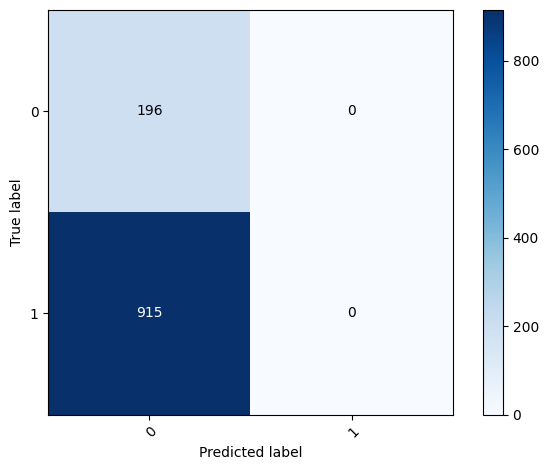

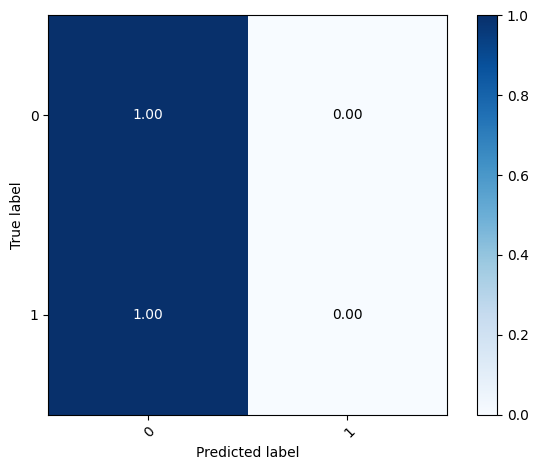

In [66]:

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_cnn, classes=class_names)
# plt.savefig('cm-cnn.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_cnn, classes=class_names, normalize=True)
# plt.savefig('cm-cnn-normalized.png')
plt.show()

In [68]:
from sklearn.metrics import f1_score

print("(Weighted) F1 score of FastTextEmb B-LSTM model:")
f1_score(y_test, y_pred_blstm, average='weighted')

(Weighted) F1 score of FastTextEmb B-LSTM model:


NameError: ignored

In [69]:
print("(Weighted) F1 score of FastTextEmb CNN model:")
f1_score(y_test, y_pred_cnn, average='weighted')

(Weighted) F1 score of FastTextEmb CNN model:


0.05291179462246148

## 2023/08/18

*   Added "Change runtime type" to the menu in the connection button.
*   Improved auto-reconnection to an already running notebook ([#3764](https://github.com/googlecolab/colabtools/issues/3764))
*   Increased the specs of our highmem machines for Pro users.
*   Fixed `add-apt-repository` command on Ubuntu 22.04 runtime ([#3867](https://github.com/googlecolab/colabtools/issues/3867))
*   Python package upgrades
    * bokeh 2.4.3 -> 3.2.2
    * cmake 3.25.2 -> 3.27.2
    * cryptography 3.4.8 -> 41.0.3
    * dask 2022.12.1 -> 2023.8.0
    * distributed 2022.12.1 -> 2023.8.0
    * earthengine-api 0.1.358 -> 0.1.364
    * flax 0.7.0 -> 0.7.2
    * ipython-sql 0.4.0 -> 0.5.0
    * jax 0.4.13 -> 0.4.14
    * jaxlib 0.4.13 -> 0.4.14
    * lightgbm 3.3.5 -> 4.0.0
    * mkl 2019.0 -> 2023.2.0
    * notebook 6.4.8 -> 6.5.5
    * numpy 1.22.4 -> 1.23.5
    * opencv-python 4.7.0.72 -> 4.8.0.76
    * pillow 8.4.0 -> 9.4.0
    * plotly 5.13.1 -> 5.15.0
    * prettytable 0.7.2 -> 3.8.0
    * pytensor 2.10.1 -> 2.14.2
    * spacy 3.5.4 -> 3.6.1
    * statsmodels 0.13.5 -> 0.14.0
    * xarray 2022.12.0 -> 2023.7.0
*   Python package inclusions
    * PyDrive2 1.6.3

## 2023/07/21

*   Launched auto-plotting for dataframes, available using the chart button that shows up alongside datatables ([post](https://medium.com/google-colab/colab-data-visualizations-made-easy-5e1918e5234e))
*   Added a menu to the table of contents to support running a section or collapsing/expanding sections ([post](https://medium.com/google-colab/two-new-ways-to-manage-cell-execution-fbad61b40882))
*   Added an option to automatically run the first cell or section, available under Edit -> Notebook settings ([post](https://medium.com/google-colab/two-new-ways-to-manage-cell-execution-fbad61b40882))
*   Launched Pro/Pro+ to Algeria, Argentina, Chile, Ecuador, Egypt, Ghana, Kenya, Malaysia, Nepal, Nigeria, Peru, Rwanda, Saudi Arabia, South Africa, Sri Lanka, Tunisia, and Ukraine ([tweet](https://twitter.com/GoogleColab/status/1674412460017700866))
*   Added a command, "Toggle tab moves focus" for toggling tab trapping in the editor (Tools -> Command palette, "Toggle tab moves focus")
*   Fixed issue where `files.upload()` was sometimes returning an incorrect filename ([#1550](https://github.com/googlecolab/colabtools/issues/1550))
*   Fixed f-string syntax highlighting bug ([#3802](https://github.com/googlecolab/colabtools/issues/3802))
*   Disabled ambiguous characters highlighting for commonly used LaTeX characters ([#3648](https://github.com/googlecolab/colabtools/issues/3648))
*   Upgraded Ubuntu from 20.04 LTS to [22.04 LTS](https://discourse.ubuntu.com/t/jammy-jellyfish-release-notes/24668).
*   Updated the Colab Marketplace VM image
*   Python package upgrades:
    * autograd 1.6.1 -> 1.6.2
    * drivefs 76.0 -> 77.0
    * flax 0.6.11 -> 0.7.0
    * earthengine-api 0.1.357 -> 0.1.358
    * GDAL 3.3.2->3.4.3
    * google-cloud-bigquery-storage 2.20.0 -> 2.22.2
    * gspread-dataframe 3.0.8 -> 3.3.1
    * holidays 0.27.1 -> 0.29
    * jax 0.4.10 -> jax 0.4.13
    * jaxlib 0.4.10 -> jax 0.4.13
    * jupyterlab-widgets 3.0.7 -> 3.0.8
    * nbformat 5.9.0 ->  5.9.1
    * opencv-python-headless 4.7.0.72 -> 4.8.0.74
    * pygame 2.4.0 -> 2.5.0
    * spacy 3.5.3 -> 3.5.4
    * SQLAlchemy 2.0.16 -> 2.0.19
    * tabulate 0.8.10 -> 0.9.0
    * tensorflow-hub 0.13.0 -> 0.14.0

## 2023/06/23

* Launched AI coding features to subscribed users starting with Pro+ users in the US ([tweet](https://twitter.com/GoogleColab/status/1661056135196217346), [post](https://blog.google/technology/developers/google-colab-ai-coding-features/)).
* Added the Kernel Selector in the Notebook Settings ([tweet](https://twitter.com/GoogleColab/status/1671265645756039168)).
* Fixed double space trimming issue in markdown [#3766](https://github.com/googlecolab/colabtools/issues/3766).
* Fixed run button indicator not always centered [#3609](https://github.com/googlecolab/colabtools/issues/3609).
* Fixed inconsistencies for automatic indentation on multi-line [#3697](https://github.com/googlecolab/colabtools/issues/3697)
* Upgraded Python from 3.10.11 to 3.10.12
* Python package updates:
  * duckdb 0.7.1 -> 0.8.1
  * earthengine-api 0.1.350 -> 0.1.357
  * flax 0.6.9 -> 0.6.11
  * google-cloud-bigquery 3.9.0 -> 3.10.0
  * google-cloud-bigquery-storage 2.19.1 -> 2.20.0
  * grpcio 1.54.0 -> 1.56.0
  * holidays 0.25 -> 0.27.1
  * nbformat 5.8.0 -> 5.9.0
  * prophet 1.1.3 -> 1.1.4
  * pydata-google-auth 1.7.0 -> 1.8.0
  * spacy 3.5.2 -> 3.5.3
  * tensorboard 2.12.2 -> 2.12.3
  * xgboost 1.7.5 -> 1.7.6
* Python package inclusions:
  * gcsfs 2023.6.0
  * geopandas 0.13.2
  * google-cloud-bigquery-connection 1.12.0
  * google-cloud-functions 1.13.0  
  * grpc-google-iam-v1 0.12.6
  * multidict 6.0.4
  * tensorboard-data-server 0.7.1

## 2023/06/02

* Released the new site [colab.google](https://colab.google).
* Published Colab's Docker runtime image to us-docker.pkg.dev/colab-images/public/runtime ([tweet](https://twitter.com/GoogleColab/status/1663594080436375558), [instructions](https://research.google.com/colaboratory/local-runtimes.html)).
* Launched support for Google children accounts ([tweet](https://twitter.com/GoogleColab/status/1661811016664231937)).
* Launched DagsHub integration ([tweet](https://twitter.com/TheRealDagsHub/status/1658098271850749956), [post](https://dagshub.com/blog/google-colab-integration/)).
* Upgraded to Monaco Editor Version 0.37.1.
* Fixed various Vim keybinding bugs.
* Fixed issue where the N and P letters sometimes couldn't be typed ([#3664](https://github.com/googlecolab/colabtools/issues/3664)).
* Fixed rendering support for compositional inputs ([#3660](https://github.com/googlecolab/colabtools/issues/3660), [#3679](https://github.com/googlecolab/colabtools/issues/3660)).
* Fixed lag in notebooks with lots of cells ([#3676](https://github.com/googlecolab/colabtools/issues/3676)).
* Improved support for R by adding a Runtime type notebook setting (Edit -> Notebook settings).
* Improved documentation for connecting to a local runtime (Connect -> Connect to a local runtime).
* Python package updates:
  * holidays 0.23 -> 0.25
  * jax 0.4.8 -> 0.4.10
  * jaxlib 0.4.8 -> 0.4.10
  * pip 23.0.1 -> 23.1.2
  * tensorflow-probability 0.19.0 -> 0.20.1
  * torch 2.0.0 -> 2.0.1
  * torchaudio 2.0.1 -> 2.0.2
  * torchdata 0.6.0 -> 0.6.1
  * torchtext 0.15.1 -> 0.15.2
  * torchvision 0.15.1 -> 0.15.2
  * tornado 6.2 -> 6.3.1

## 2023/05/05

* Released GPU type selection for paid users, allowing them to choose a preferred NVidia GPU
* Upgraded R from 4.2.3 to 4.3.0
* Upgraded Python from 3.9.16 to 3.10.11
* Python package updates:
  * attrs 22.2.0 -> attrs 23.1.0
  * earthengine-api 0.1.349 -> earthengine-api 0.1.350
  * flax 0.6.8 -> 0.6.9
  * grpcio 1.53.0 -> 1.54.0
  * nbclient 0.7.3 -> 0.7.4
  * tensorflow-datasets 4.8.3 -> 4.9.2
  * termcolor 2.2.0 -> 2.3.0
  * zict 2.2.0 -> 3.0.0

## 2023/04/14

* Python package updates:
  * google-api-python-client 2.70.0 -> 2.84.0
  * google-auth-oauthlib 0.4.6 -> 1.0.0
  * google-cloud-bigquery 3.4.2 -> 3.9.0
  * google-cloud-datastore 2.11.1 -> 2.15.1
  * google-cloud-firestore 2.7.3 -> 2.11.0
  * google-cloud-language 2.6.1 -> 2.9.1
  * google-cloud-storage 2.7.0 -> 2.8.0
  * google-cloud-translate 3.8.4 -> 3.11.1
  * networkx 3.0 -> 3.1
  * notebook 6.3.0 -> 6.4.8
  * jax 0.4.7 -> 0.4.8
  * pandas 1.4.4 -> 1.5.3
  * spacy 3.5.1 -> 3.5.2
  * SQLAlchemy 1.4.47 -> 2.0.9
  * xgboost 1.7.4 -> 1.7.5

## 2023/3/31

* Improve bash ! syntax highlighting ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3507))
* Fix bug where VIM keybindings weren't working in the file editor
* Upgraded R from 4.2.2 to 4.2.3
* Python package updates:
  * arviz 0.12.1 --> 0.15.1
  * astropy 4.3.1 --> 5.2.2
  * dopamine-rl 1.0.5 --> 4.0.6
  * gensim 3.6.0 --> 4.3.1
  * ipykernel 5.3.4 -> 5.5.6
  * ipython 7.9.0 -> 7.34.0
  * jax 0.4.4 -> 0.4.7
  * jaxlib 0.4.4 -> 0.4.7
  * jupyter_core 5.2.0 -> 5.3.0
  * keras 2.11.0 -> 2.12.0
  * lightgbm 2.2.3 -> 3.3.5
  * matplotlib 3.5.3 -> 3.7.1
  * nltk 3.7 -> 3.8.1
  * opencv-python 4.6.0.66 -> 4.7.0.72
  * plotly 5.5.0 -> 5.13.1
  * pymc 4.1.4 -> 5.1.2
  * seaborn 0.11.2 -> 0.12.2
  * spacy 3.4.4 -> 3.5.1
  * sympy 1.7.1 -> 1.11.1
  * tensorboard 2.11.2 -> 2.12.0
  * tensorflow 2.11.0 -> 2.12.0
  * tensorflow-estimator 2.11.0 -> 2.12.0
  * tensorflow-hub 0.12.0 -> 0.13.0
  * torch 1.13.1 -> 2.0.0
  * torchaudio 0.13.1 -> 2.0.1
  * torchtext 0.14.1 -> 0.15.1
  * torchvision 0.14.1 -> 0.15.1



## 2023/3/10

*   Added the [Colab editor shortcuts](https://colab.research.google.com/notebooks/editor_shortcuts.ipynb) example notebook
*   Fixed triggering of @-mention and email autocomplete for large comments ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3383))
*   Added View Resources to the Runtime menu
*   Made file viewer images fit the view by default, resizing to original size on click
*   When in VIM mode, enable copy as well as allowing propagation to monaco-vim to escape visual mode ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3414))
*   Upgraded CUDA 11.6.2 -> 11.8.0 and cuDNN 8.4.0.27 -> 8.7.0.84
*   Upgraded Nvidia drivers 525.78.01 -> 530.30.02
*   Upgraded Python 3.8.10 -> 3.9.16
*   Python package updates:
  * beautifulsoup4 4.6.3 -> 4.9.3
  * bokeh 2.3.3 -> 2.4.3
  * debugpy 1.0.0 -> 1.6.6
  * Flask 1.1.4 -> 2.2.3
  * jax 0.3.25 -> 0.4.4
  * jaxlib 0.3.25 -> 0.4.4
  * Jinja2 2.11.3 -> 3.1.2
  * matplotlib 3.2.2 -> 3.5.3
  * nbconvert 5.6.1 -> 6.5.4
  * pandas 1.3.5 -> 1.4.4
  * pandas-datareader 0.9.0 -> 0.10.0
  * pandas-profiling 1.4.1 -> 3.2.0
  * Pillow 7.1.2 -> 8.4.0
  * plotnine 0.8.0 -> 0.10.1
  * scikit-image 0.18.3 -> 0.19.3
  * scikit-learn 1.0.2 -> 1.2.2
  * scipy 1.7.3 -> 1.10.1
  * setuptools 57.4.0 -> 63.4.3
  * sklearn-pandas 1.8.0 -> 2.2.0
  * statsmodels 0.12.2 -> 0.13.5
  * urllib3 1.24.3 -> 1.26.14
  * Werkzeug 1.0.1 -> 2.2.3
  * wrapt 1.14.1 -> 1.15.0
  * xgboost 0.90 -> 1.7.4
  * xlrd 1.2.0 -> 2.0.1


## 2023/2/17

*   Show graphs of RAM and disk usage in notebook toolbar
*   Copy cell links directly to the clipboard instead of showing a dialog when clicking on the link icon in the cell toolbar
*   Updated the [Colab Marketplace VM image](https://research.google.com/colaboratory/marketplace.html)
*   Upgraded CUDA to 11.6.2 and cuDNN to 8.4.0.27
*   Python package updates:
  * tensorflow 2.9.2 -> 2.11.0
  * tensorboard 2.9.1 -> 2.11.2
  * keras 2.9.0 -> 2.11.0
  * tensorflow-estimator 2.9.0 -> 2.11.0
  * tensorflow-probability 0.17.0 -> 0.19.0
  * tensorflow-gcs-config 2.9.0 -> 2.11.0
  * earthengine-api 0.1.339 -> 0.1.341
  * flatbuffers 1.12 -> 23.1.21
  * platformdirs 2.6.2 -> 3.0.0
  * pydata-google-auth 1.6.0 -> 1.7.0
  * python-utils 3.4.5 -> 3.5.2
  * tenacity 8.1.0 -> 8.2.1
  * tifffile 2023.1.23.1 -> 2023.2.3
  * notebook 5.7.16 -> 6.3.0
  * tornado 6.0.4 -> 6.2
  * aiohttp 3.8.3 -> 3.8.4
  * charset-normalizer 2.1.1 -> 3.0.1
  * fastai 2.7.0 -> 2.7.1
  * soundfile 0.11.0 -> 0.12.1
  * typing-extensions 4.4.0 -> 4.5.0
  * widgetsnbextension 3.6.1 -> 3.6.2
  * pydantic 1.10.4 -> 1.10.5
  * zipp 3.12.0 -> 3.13.0
  * numpy 1.21.6 -> 1.22.4
  * drivefs 66.0 -> 69.0
  * gdal 3.0.4 -> 3.3.2 [GitHub issue](https://github.com/googlecolab/colabtools/issues/3375)
* Added libudunits2-dev for smoother R package installs [GitHub issue](https://github.com/googlecolab/colabtools/issues/2831)


## 2023/2/3

*   Improved tooltips for pandas series to show common statistics about the series object
*   Made the forms dropdown behave like an autocomplete box when it allows input
*   Updated the nvidia driver from 460.32.03 to 510.47.03
*   Python package updates:
    *   absl-py 1.3.0 -> 1.4.0
    *   bleach 5.0.1 -> 6.0.0
    *   cachetools 5.2.1 -> 5.3.0
    *   cmdstanpy 1.0.8 -> 1.1.0
    *   dnspython 2.2.1 -> 2.3.0
    *   fsspec 2022.11.0 -> 2023.1.0
    *   google-cloud-bigquery-storage 2.17.0 -> 2.18.1
    *   holidays 0.18 -> 0.19
    *   jupyter-core 5.1.3 -> 5.2.0
    *   packaging 21.3 -> 23.0
    *   prometheus-client 0.15.0 -> 0.16.0
    *   pyct 0.4.8 -> 0.5.0
    *   pydata-google-auth 1.5.0 -> 1.6.0
    *   python-slugify 7.0.0 -> 8.0.0
    *   sqlalchemy 1.4.46 -> 2.0.0
    *   tensorflow-io-gcs-filesystem 0.29.0 -> 0.30.0
    *   tifffile 2022.10.10 -> 2023.1.23.1
    *   zipp 3.11.0 -> 3.12.0
    *   Pinned sqlalchemy to version 1.4.46



## 2023/1/12

*   Added support for @-mention and email autocomplete in comments
*   Improved errors when GitHub notebooks can't be loaded
*   Increased color contrast for colors used for syntax highlighting in the code editor
*   Added terminal access for custom GCE VM runtimes
*   Upgraded Ubuntu from 18.04 LTS to 20.04 LTS ([GitHub issue]((https://github.com/googlecolab/colabtools/issues/3327)))
*   Python package updates:
  *   GDAL 2.2.2 -> 2.2.3.
  *   NumPy from 1.21.5 to 1.21.6.
  *   attrs 22.1.0 -> 22.2.0
  *   chardet 3.0.4 -> 4.0.0
  *   cloudpickle 1.6.0 -> 2.2.0
  *   filelock 3.8.2 -> 3.9.0
  *   google-api-core 2.8.2 -> 2.11.0
  *   google-api-python-client 1.12.11 -> 2.70.0
  *   google-auth-httplib2 0.0.3 -> 0.1.0
  *   google-cloud-bigquery 3.3.5 -> 3.4.1
  *   google-cloud-datastore 2.9.0 -> 2.11.0
  *   google-cloud-firestore 2.7.2 -> 2.7.3
  *   google-cloud-storage 2.5.0 -> 2.7.0
  *   holidays 0.17.2 -> holidays 0.18
  *   importlib-metadata 5.2.0 -> 6.0.0
  *   networkx 2.8.8 -> 3.0
  *   opencv-python-headless 4.6.0.66 -> 4.7.0.68
  *   pip 21.1.3 -> 22.04
  *   pip-tools 6.2.0 -> 6.6.2
  *   prettytable 3.5.0 -> 3.6.0
  *   requests 2.23.0 -> 2.25.1
  *   termcolor 2.1.1 -> 2.2.0
  *   torch 1.13.0 -> 1.13.1
  *   torchaudio 0.13.0 -> 0.13.1
  *   torchtext 0.14.0-> 0.14.1
  *   torchvision 0.14.0 -> 0.14.1

## 2022/12/6


*   Made fallback runtime version available until mid-December ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3246))
*   Upgraded to Python 3.8 ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3246))
*   Python package updates:
  *   jax from 0.3.23 to 0.3.25, jaxlib from 0.3.22 to 0.3.25
  *   pyarrow from 6.0.1 to 9.0.0
  *   torch from 1.12.1 to 1.13.0
  *   torchaudio from 0.12.1 to 0.13.0
  *   torchvision from 0.13.1 to 0.14.0
  *   torchtext from 0.13.1 to 0.14.0
  *   xlrd from 1.1.0 to 1.2.0
  *   DriveFS from 62.0.1 to 66.0.3
*   Made styling of markdown tables in outputs match markdown tables in text cells
*   Improved formatting for empty interactive table rows
*   Fixed syntax highlighting for variables with names that contain Python keywords ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3210))


## 2022/11/11

*   Added more dark editor themes for Monaco (when in dark mode, "Editor colorization" appears as an option in the Editor tab of the Tools → Settings dialog)
*   Fixed bug where collapsed forms were deleted on mobile
[GitHub issue](https://github.com/googlecolab/colabtools/issues/3153)
*   Python package updates:
  *   rpy2 from 3.4.0 to 3.5.5 ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3180))
  *   notebook from 5.5.0 to 5.7.16
  *   tornado from 5.1.1 to 6.0.4
  *   tensorflow_probability from 0.16.0 to 0.17.0
  *   pandas-gbq from 0.13.3 to 0.17.9
  *   protobuf from 3.17.3 to 3.19.6
  *   google-api-core[grpc] from 1.31.5 to 2.8.2
  *   google-cloud-bigquery from 1.21.0 to 3.3.5
  *   google-cloud-core from 1.0.1 to 2.3.2
  *   google-cloud-datastore from 1.8.0 to 2.9.0
  *   google-cloud-firestore from 1.7.0 to 2.7.2
  *   google-cloud-language from 1.2.0 to 2.6.1
  *   google-cloud-storage from 1.18.0 to 2.5.0
  *   google-cloud-translate from 1.5.0 to 3.8.4

## 2022/10/21

*   Launched a single-click way to get from BigQuery to Colab to further explore query results ([announcement](https://cloud.google.com/bigquery/docs/explore-data-colab))
*   Launched [Pro, Pro+, and Pay As You Go](https://colab.research.google.com/signup) to 19 additional countries: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, Greece, Hungary, Latvia, Lithuania, Norway, Portugal, Romania, Slovakia, Slovenia, and Sweden ([tweet](https://twitter.com/GoogleColab/status/1579956393834344449))
*   Updated jax from 0.3.17 to 0.3.23, jaxlib from 0.3.15 to 0.3.22, TensorFlow from 2.8.2 to 2.9.2, CUDA from 11.1 to 11.2, and cuDNN from 8.0 to 8.1 ([backend-info](https://github.com/googlecolab/backend-info))
*   Added a `readonly` option to [`drive.mount`](https://github.com/googlecolab/colabtools/blob/main/google/colab/drive.py#L99)
*   Fixed bug where Xarray was not working ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3134))
*   Modified Markdown parsing to ignore block quote symbol within MathJax ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3118))


## 2022/9/30

*   Launched [Pay As You Go](https://colab.research.google.com/signup), allowing premium GPU access without requiring a subscription
*   Added vim and tcllib to our runtime image
*   Fixed bug where open files were closed on kernel disconnect ([GitHub issue](https://github.com/googlecolab/colabtools/issues/1716))
*   Fixed bug where the play button/execution indicator was not clickable when scrolled into the cell output ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3068))
*   Updated the styling for form titles so that they avoid obscuring the code editor
*   Created a GitHub repo, [backend-info](https://github.com/googlecolab/backend-info), with the latest apt-list.txt and pip-freeze.txt files for the Colab runtime ([GitHub issue](https://github.com/googlecolab/colabtools/issues/1445))
*   Added [`files.upload_file(filename)`](https://github.com/googlecolab/colabtools/blob/main/google/colab/files.py#L33) to upload a file from the browser to the runtime with a specified filename


## 2022/9/16

*   Upgraded pymc from 3.11.0 to 4.1.4, jax from 0.3.14 to 0.3.17, jaxlib from 0.3.14 to 0.3.15, fsspec from 2022.8.1 to 2022.8.2
*   Modified our save flow to avoid persisting Drive filenames as titles in notebook JSON
*   Updated our [Terms of Service](https://colab.research.google.com/pro/terms)
*   Modified the `Jump to Cell` command to locate the cursor at the end of the command palette input (`Jump to cell` in Tools → Command palette in a notebook with section headings)
*   Updated the styling of the Drive notebook comment UI
*   Added support for terminating your runtime from code:
  ```python
  from google.colab import runtime
  runtime.unassign()
  ```
*    Added regex filter support to the Recent notebooks dialog
*    Inline google.colab.files.upload JS to fix `files.upload()` not working ([GitHub issue](https://github.com/googlecolab/colabtools/issues/51))


## 2022/8/26

*   Upgraded PyYAML from 3.13 to 6.0 ([GitHub issue](https://github.com/googlecolab/colabtools/issues/2942)), drivefs from 61.0.3 to 62.0.1
*   Upgraded TensorFlow from 2.8.2 to 2.9.1 and ipywidgets from 7.7.1 to 8.0.1 but rolled both back due to a number of user reports ([GitHub issue](https://github.com/googlecolab/colabtools/issues/3008), [GitHub issue](https://github.com/googlecolab/colabtools/issues/3020#issuecomment-1223330253))
*   Stop persisting inferred titles in notebook JSON ([GitHub issue](https://github.com/googlecolab/colabtools/issues/764))
*   Fix bug in background execution which affected some Pro+ users ([GitHub issue](https://github.com/googlecolab/colabtools/issues/2991))
*   Fix bug where `Download as .py` incorrectly handled text cells ending in a double quote
*   Fix bug for Pro and Pro+ users where we weren't honoring the preference (Tools → Settings) to use a temporary scratch notebook as the default landing page
*   Provide undo/redo for scratch cells
*   When writing ipynb files, serialize empty multiline strings as `[]` for better consistency with JupyterLab


## 2022/8/11

*   Upgraded ipython from 5.5.0 to 7.9.0, fbprophet 0.7 to prophet 1.1, tensorflow-datasets from 4.0.1 to 4.6.0, drivefs from 60.0.2 to 61.0.3, pytorch from 1.12.0 to 1.12.1, numba from 0.51 to 0.56, and lxml from 4.2.0 to 4.9.1
*   Loosened our `requests` version requirement ([GitHub issue](https://github.com/deepset-ai/haystack/pull/2921#issuecomment-1199714337))
*   Removed support for TensorFlow 1
*   Added Help → Report Drive abuse for Drive notebooks
*   Fixed indentation for Python lines ending in `[`
*   Modified styling of tables in Markdown to left-align them rather than centering them
*   Fixed special character replacement when copying interactive tables as Markdown
*   Fixed ansi 8-bit color parsing ([GitHub issue](https://github.com/googlecolab/colabtools/issues/2963))
*  Configured logging to preempt transitive imports and other loading from implicitly configuring the root logger
*  Modified forms to use a value of `None` instead of causing a parse error when clearing raw and numeric-typed form fields

## 2022/7/22

*   Update scipy from 1.4.1 to 1.7.3, drivefs from 59.0.3 to 60.0.2, pytorch from 1.11 to 1.12, jax & jaxlib from 0.3.8 to 0.3.14, opencv-python from 4.1.2.30 to 4.6.0.66, spaCy from 3.3.1 to 3.4.0, and dlib from 19.18.0 to 19.24.0
*   Fix `Open in tab` doc link which was rendering incorrectly ([GitHub issue](https://github.com/googlecolab/colabtools/issues/2690))
*   Add a preference for the default tab orientation to the Site section of the settings menu under Tools → Settings
*   Show a warning for `USE_AUTH_EPHEM` usage when running authenticate_user on a TPU runtime ([code](https://github.com/googlecolab/colabtools/blob/main/google/colab/auth.py#L243))

## 2022/7/1

*   Add a preference for code font to the settings menu under Tools → Settings
*   Update drivefs from 58.0.3 to 59.0.3 and spacy from 2.2.4 to 3.3.1
*   Allow [display_data](https://ipython.org/ipython-doc/3/notebook/nbformat.html#display-data) and [execute_result](https://ipython.org/ipython-doc/3/notebook/nbformat.html#execute-result) text outputs to wrap, matching behavior of JupyterLab (does not affect stream outputs/print statements).
*   Improve LSP handling of some magics, esp. %%writefile ([GitHub issue](https://github.com/googlecolab/colabtools/issues/2859)).
*   Add a [FAQ entry](https://research.google.com/colaboratory/faq.html#drive-mount-code-cell) about the mount Drive button behavior and include link buttons for each FAQ entry.
*   Fix bug where the notebook was sometimes hidden behind other tabs on load when in single pane view.
*   Fix issue with inconsistent scrolling when an editor is in multi-select mode.
*   Fix bug where clicking on a link in a form would navigate away from the notebook
*   Show a confirmation dialog before performing Replace all from the Find and replace pane.

## 2022/6/10


*   Update drivefs from 57.0.5 to 58.0.3 and tensorflow from 2.8.0 to 2.8.2
*   Support more than 100 repos in the GitHub repo selector shown in the open dialog and the clone to GitHub dialog
*   Show full notebook names on hover in the open dialog
*   Improve the color contrast for links, buttons, and the `ipywidgets.Accordion` widget in dark mode

## 2022/5/20


*   Support URL params for linking to some common pref settings: [force_theme=dark](https://colab.research.google.com/?force_theme=dark), [force_corgi_mode=1](https://colab.research.google.com/?force_corgi_mode=1), [force_font_size=14](https://colab.research.google.com/?force_font_size=14). Params forced by URL are not persisted unless saved using Tools → Settings.
*   Add a class `markdown-google-sans` to allow <span class="markdown-google-sans">Markdown to render in Google Sans</span>
*   Update monaco-vim from 0.1.19 to 0.3.4
*   Update drivefs from 55.0.3 to 57.0.5, jax from 0.3.4 to 0.3.8, and jaxlib from 0.3.2 to 0.3.7

## 2022/4/29


*   Added 🦀 mode (under Miscellaneous in Tools → Settings)
*   Added "Disconnect and delete runtime" option to the menu next to the Connect button
*   Improved rendering of filter options in an interactive table
*   Added git-lfs to the base image
*   Updated torch from 1.10.0 to 1.11.0, jupyter-core from 4.9.2 to 4.10.0, and cmake from 3.12.0 to 3.22.3
*   Added more details to our [FAQ](https://research.google.com/colaboratory/faq.html) about unsupported uses (using proxies, downloading torrents, etc.)
*   Fixed [issue](https://github.com/googlecolab/colabtools/issues/2779) with apt-get dependencies


## 2022/4/15

*   Add an option in the file browser to show hidden files.
*   Upgrade gdown from 4.2.0 to 4.4.0, google-api-core[grpc] from 1.26.0 to 1.31.5, and pytz from 2018.4 to 2022.1

## 2022/3/25


*   Launched [Pro/Pro+](https://colab.research.google.com/signup?utm_source=relnotes&utm_medium=link&utm_campaign=additional_countries) to 12 additional countries: Australia, Bangladesh, Colombia, Hong Kong, Indonesia, Mexico, New Zealand, Pakistan, Philippines, Singapore, Taiwan, and Vietnam
*   Added [`google.colab.auth.authenticate_service_account()`](https://github.com/googlecolab/colabtools/blob/main/google/colab/auth.py#L253) to support using [Service Account keys](https://cloud.google.com/iam/docs/creating-managing-service-account-keys#iam-service-account-keys-create-console)
*   Update jax from 0.3.1 to 0.3.4 & jaxlib from 0.3.0 to 0.3.2
*   Fixed an issue with Twitter previews of notebooks shared as Github Gists


## 2022/3/10


*   Launched [Pro/Pro+](https://colab.research.google.com/signup?utm_source=relnotes&utm_medium=link&utm_campaign=additional_countries) to 10 new countries: Ireland, Israel, Italy, Morocco, the Netherlands, Poland, Spain, Switzerland, Turkey, and the United Arab Emirates
*   Launched support for [scheduling notebooks for Pro+ users](https://github.com/googlecolab/colabtools/wiki/Scheduled-notebooks)
*   Fixed bug in interactive datatables where filtering by number did not work
*   Finished removing the python2 kernelspec



## 2022/2/25

*   Made various accessibility improvements to the header
*   Fix bug with [forms run:auto](https://colab.sandbox.google.com/notebooks/forms.ipynb#scrollTo=h9aZYKhly2h_) where a form field change would trigger multiple runs
*   Minor updates to the [bigquery example notebook](https://colab.research.google.com/notebooks/bigquery.ipynb) and snippet
*   Include background execution setting in the sessions dialog for Pro+ users
*   Update tensorflow-probability from 0.15 to 0.16
*   Update jax from 0.2.25 to 0.3.1 & jaxlib from 0.1.71 to 0.3.0


## 2022/2/11

*   Improve keyboard navigation for the open dialog
*   Fix issue where nvidia-smi stopped reporting resource utilization for some users who were modifying the version of nvidia used
*   Update tensorflow from 2.7 to 2.8, keras from 2.7 to 2.8, numpy from 1.19.5 to 1.21.5, tables from 3.4.4 to 3.7.0


## 2022/2/4

*   Improve UX for opening content alongside your notebook, such as files opened from the file browser. This includes a multi-pane view and drag-drop support
*   Better Twitter previews when sharing example Colab notebooks and notebooks opened from GitHub Gists
*   Update pandas from 1.1.5 to 1.3.5
*   Update openpyxl from 2.5.9 to 3.0.0 and pyarrow from 3.0.0 to 6.0.0
*   Link to the release notes from the Help menu



## 2022/1/28

*   Add a copy button to [data tables](https://colab.research.google.com/notebooks/data_table.ipynb)
*   Python LSP support for better completions and code diagnostics. This can be configured in the Editor Settings (Tools → Settings)
*   Update [gspread examples](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=sOm9PFrT8mGG) in our documentation
*   Update gdown from 3.6 to 4.2


## 2022/1/21

*   New documentation for the [`google.colab` package](https://colab.research.google.com/notebooks/google.colab.ipynb)
*   Show GPU RAM in the resource usage tab
*   Improved security for mounting Google Drive which disallows mounting Drive from accounts other than the one currently executing the notebook

## 2022/1/14

*   Add a preference (Tools → Settings) to use a temporary scratch notebook as the default landing page
*   Fix bug where `/` and `:` weren't working in VIM mode
*   Update gspread from 3.0 to 3.4
*   Update the [Colab Marketplace VM image](https://research.google.com/colaboratory/marketplace.html)

